<a href="https://colab.research.google.com/github/ArtMla/MNIST-Image-classification/blob/main/MNIST_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Loading and Exploration
In this phase, we load the MNIST dataset and visualize sample images to understand the structure and shape of the data. MNIST consists of 28x28 grayscale images of handwritten digits ranging from 0 to 9.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


## 1.1 Visualizing Sample Digits
Below are the first 9 samples from the training dataset, showing the handwritten digits and their corresponding labels.

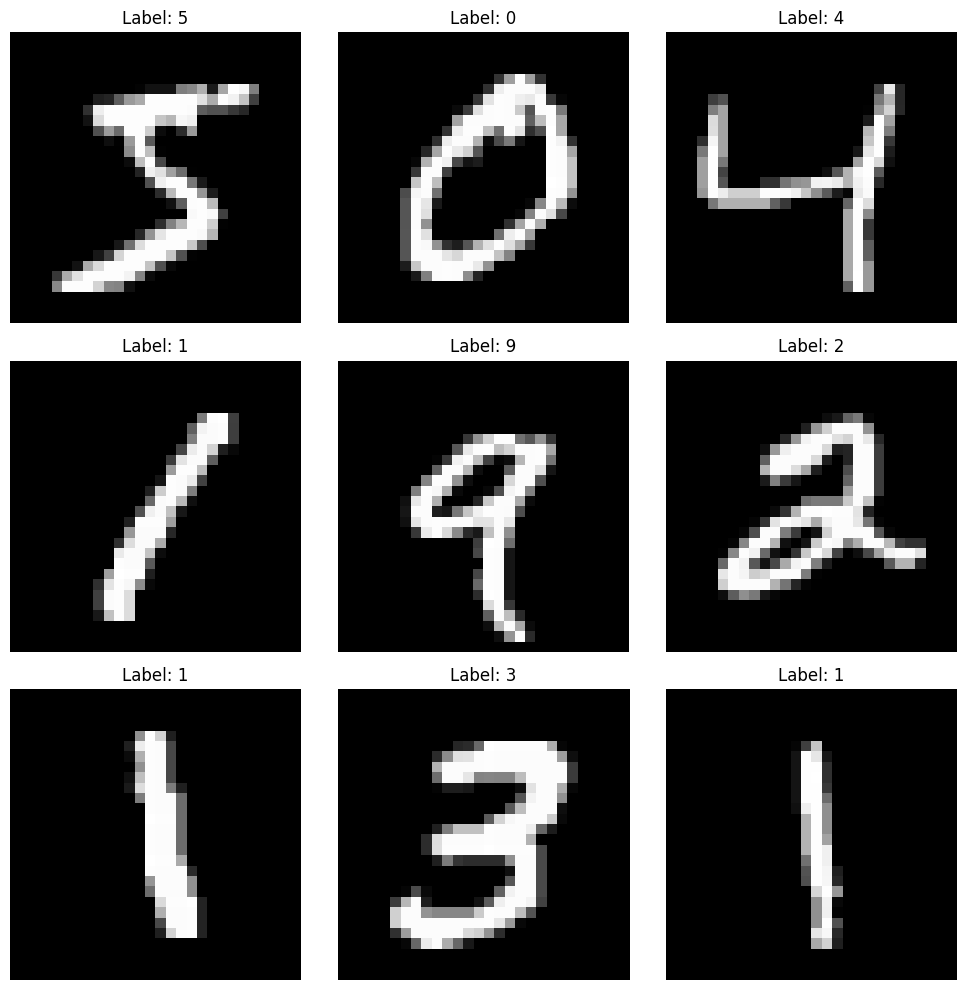

In [3]:
# Show the first 9 digits
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Step 2: Pre-processing

To prepare the MNIST data for training, we perform the following preprocessing steps:



*   Normalization: Scales pixel values from [0, 255] to [0, 1] for faster
convergence.
*   Flattening: Converts each 28x28 image into a 784-dimensional vector for input into dense layers.
*   One-hot Encoding: Transforms digit labels (0–9) into binary vectors suitable for multi-class classification.


In [4]:
# Normalise the pixels to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the 28x28 images into 784-dimension vectors
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Confirm the shape
print("Flattened training data shape:", x_train_flat.shape)
print("Flattened test data shape:", x_test_flat.shape)



Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [5]:
# Build Model A with ReLU activation
model_relu = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model_relu.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_relu.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Model B – Neural Network with Tanh Activation
This model uses the Tanh activation function in all hidden layers. Tanh outputs values between -1 and 1 and is zero-centered, which can sometimes result in better weight updates than ReLU for certain datasets. However, it is prone to vanishing gradients in deep networks.

Architecture:



* Input layer: 784 units (flattened image)
*  Hidden Layer 1: 128 neurons, Tanh
*  Hidden Layer 2: 64 neurons, Tanh






In [6]:
# Build Model B with Tanh activation
model_tanh = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(10, activation='softmax')
])

# Compile the model
model_tanh.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_tanh.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

# Step 4: Model Training
In this phase, we train both models using the same training configuration to ensure a fair comparison. We use 20% of the training data as a validation set to monitor model performance during training.

## 4.1 Training Model A – ReLU
Model A is trained for 20 epochs with a batch size of 128 using the Adam optimizer. We track training and validation accuracy and loss to identify signs of overfitting or underfitting.

In [7]:
# Train Model A (ReLU)
history_relu = model_relu.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7811 - loss: 0.7387 - val_accuracy: 0.9473 - val_loss: 0.1879
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9501 - loss: 0.1737 - val_accuracy: 0.9608 - val_loss: 0.1373
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9673 - loss: 0.1132 - val_accuracy: 0.9645 - val_loss: 0.1212
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9729 - loss: 0.0903 - val_accuracy: 0.9689 - val_loss: 0.1073
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9798 - loss: 0.0703 - val_accuracy: 0.9701 - val_loss: 0.1000
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9844 - loss: 0.0537 - val_accuracy: 0.9699 - val_loss: 0.1027
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9874 - loss: 0.0420 - val_accuracy: 0.9683 - val_loss: 0.1067
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.

## 🔍 Observations from Training (Model A – ReLU)

*   Model A using ReLU activation reached a training accuracy of 99.49% and a validation accuracy of 97.55% by epoch 20.

*   The model showed fast initial convergence, achieving over 95% validation accuracy by epoch 3 — consistent with ReLU's known advantage in speeding up learning.

*   However, after around epoch 6–7, validation loss began to fluctuate or increase, while training accuracy continued to rise — a classic sign of overfitting.
*   This supports the theoretical behavior of ReLU:
    - Fast learning due to non-saturating gradients
    - But more prone to overfitting if not regularized


*   Despite slight overfitting, the final validation accuracy remained high, making ReLU an effective choice — though some tuning may help reduce generalization error.

The next phase, we will compare this behavior visually with the Tanh model.



## 4.2 Training Model B – Tanh
This model uses the same architecture, optimizer (Adam), and training configuration as the ReLU-based model to ensure a fair comparison. The only difference is the use of the Tanh activation function in the hidden layers.

Tanh outputs values between -1 and 1, and being zero-centered can sometimes lead to better convergence during optimization. However, it is more susceptible to the vanishing gradient problem compared to ReLU, especially in deeper networks.

We will track accuracy and loss across 20 epochs using 20% of the training data for validation.

In [8]:
# Train Model B (Tanh)
history_tanh = model_tanh.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8002 - loss: 0.7303 - val_accuracy: 0.9427 - val_loss: 0.2081
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9437 - loss: 0.1945 - val_accuracy: 0.9582 - val_loss: 0.1507
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9629 - loss: 0.1262 - val_accuracy: 0.9631 - val_loss: 0.1252
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9737 - loss: 0.0899 - val_accuracy: 0.9683 - val_loss: 0.1097
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9807 - loss: 0.0701 - val_accuracy: 0.9707 - val_loss: 0.1005
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9847 - loss: 0.0530 - val_accuracy: 0.9695 - val_loss: 0.1030
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9888 - loss: 0.0411 - val_accuracy: 0.9691 - val_loss: 0.1014
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9906 - loss: 0.0343 - val_accuracy: 0.

##🔍 Observations from Training (Model B – Tanh)



*   The model using Tanh activation achieved a training accuracy of 99.85% and a validation accuracy of 97.68% by epoch 20.
*   Validation accuracy steadily increased throughout training, peaking at epoch 19 — suggesting more stable convergence compared to ReLU.

*   Despite higher accuracy, there is some validation loss fluctuation in later epochs, indicating mild overfitting.
*   Compared to ReLU, Tanh showed a slower but steadier performance, which aligns with its theoretical behavior:
    - Tanh is zero-centered and smooth, which can help training
    - But it's more prone to vanishing gradients, especially in deeper layers

*   Overall, Tanh handled the task well, and may benefit further from techniques like early stopping or regularization.


We will visualize and compare both models in Phase 5.



# Step 5: Evaluation and Visualization
In this phase, we evaluate both models by plotting their training and validation accuracy and loss over 20 epochs. This visual comparison helps identify differences in convergence speed, generalization ability, and signs of overfitting.

## 5.1 Accuracy Comparison
The plot below compares the training and validation accuracy of both ReLU and Tanh models across all epochs. This helps visualize which model learned faster and which generalized better on unseen data.

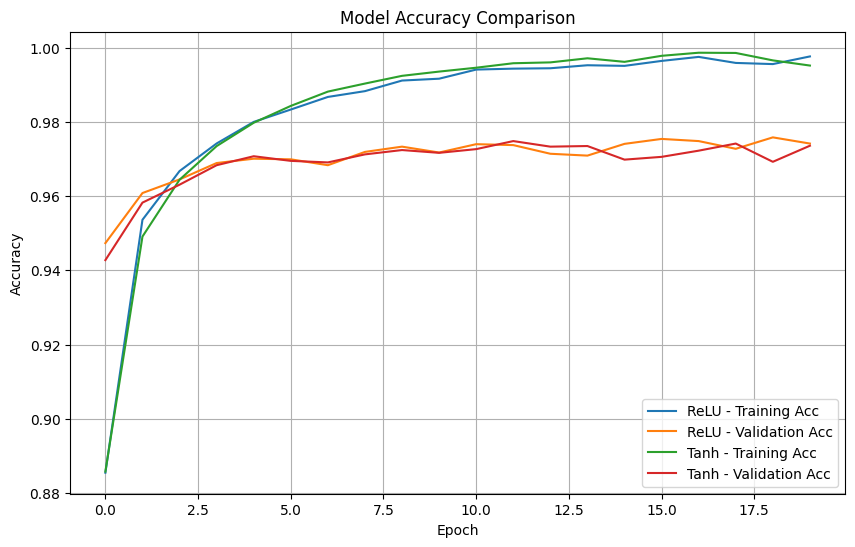

In [9]:
# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_relu.history['accuracy'], label='ReLU - Training Acc')
plt.plot(history_relu.history['val_accuracy'], label='ReLU - Validation Acc')
plt.plot(history_tanh.history['accuracy'], label='Tanh - Training Acc')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh - Validation Acc')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 5.2 Loss Comparison
The following plot compares the training and validation loss for both models. A rising validation loss while training loss continues to fall typically indicates overfitting.

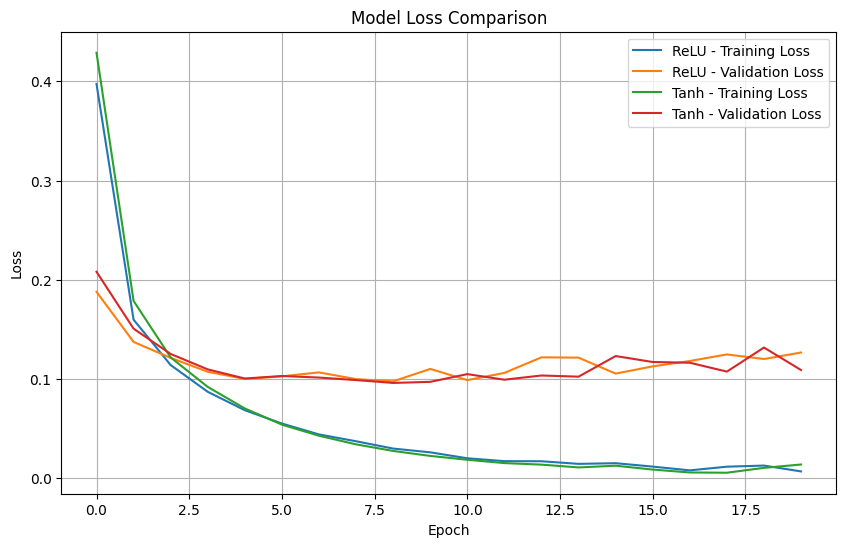

In [10]:
# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history_relu.history['loss'], label='ReLU - Training Loss')
plt.plot(history_relu.history['val_loss'], label='ReLU - Validation Loss')
plt.plot(history_tanh.history['loss'], label='Tanh - Training Loss')
plt.plot(history_tanh.history['val_loss'], label='Tanh - Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Comparative Analysis and Justification
Based on training results and visual evaluation, we summarize the following key differences between ReLU and Tanh activation functions:

##✅ ReLU Highlights

*   Achieved validation accuracy of 97.55%
*   Faster convergence — high accuracy within the first few epochs
*   Showed signs of overfitting after ~epoch 7 (val loss ↑ while training acc ↑)
*   Performs very well, but could benefit from regularization


##✅ Tanh Highlights


*   Achieved a slightly higher validation accuracy of 97.68%
*   More stable training — validation metrics were smoother and less volatile
*   Better generalization, with lower overfitting than ReLU
*   Slightly slower to converge in early epochs


##🧠 Conclusion

Both ReLU and Tanh performed very well, with Tanh showing slightly better validation accuracy and less overfitting in this setup. However, ReLU trained faster and may still outperform with proper regularization or early stopping.

This analysis highlights the importance of activation function choice, especially in deeper networks, where trade-offs between convergence speed and generalization must be carefully balanced.

#Step 7.1 ReLU Model with SGD Optimizer and L2 Regularization
In this experiment, we replace the Adam optimizer with Stochastic Gradient Descent (SGD) to observe whether slower, more stable learning improves generalization.

Additionally, we apply L2 regularization (penalty = 0.001) on all hidden layers to penalize large weights and reduce overfitting.

We expect SGD to train more slowly than Adam but potentially show more stable validation accuracy. L2 should also help reduce the widening gap between training and validation loss observed in earlier experiments.

In [11]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# 7.1a ReLU + SGD + L2 Regularization
model_relu_sgd = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

# Compile
model_relu_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_relu_sgd = model_relu_sgd.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3635 - loss: 2.3531 - val_accuracy: 0.8073 - val_loss: 1.1695
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8133 - loss: 1.0631 - val_accuracy: 0.8738 - val_loss: 0.8196
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8744 - loss: 0.8173 - val_accuracy: 0.8950 - val_loss: 0.7305
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8919 - loss: 0.7399 - val_accuracy: 0.9076 - val_loss: 0.6822
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9039 - loss: 0.6904 - val_accuracy: 0.9143 - val_loss: 0.6524
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9112 - loss: 0.6599 - val_accuracy: 0.9207 - val_loss: 0.6261
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9194 - loss: 0.6261 - val_accuracy: 0.9245 - val_loss: 0.6063
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9250 - loss: 0.6070 - val_accuracy: 0.

##🔍 Observation – 7.1 ReLU + SGD + L2
This model showed slower learning initially (as expected with SGD), but both training and validation accuracy steadily improved. By epoch 20, both accuracies reached 95.6%, indicating strong generalization and minimal overfitting.

Compared to the original ReLU + Adam model:


*   SGD was slower to converge but more stable
*   L2 regularization (penalty = 0.001) helped avoid overfitting, as seen from tightly tracking val/train accuracies

*   Final loss values remained higher due to the penalty term added by L2



✅ This configuration offers better control over generalization and is a strong candidate for production-ready training.

##7.1b ReLU Model with SGD (lr=0.05), L2 Regularization and EarlyStopping
In this refinement of our earlier SGD experiment, we make three key changes:


*   We increase the learning rate to 0.05 to allow faster convergence (as SGD is slower than Adam).
*   We retain L2 regularization (0.001) to reduce overfitting.
*   We add EarlyStopping to stop training once validation loss stops improving, restoring the best weights.

This combination helps balance generalization and training speed. We'll compare accuracy, loss, and stability to earlier ReLU configurations.

In [12]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# 7.1b ReLU + SGD (lr=0.05) + L2 + EarlyStopping
model_relu_sgd_opt = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

# Compile with custom learning rate
sgd_optimizer = SGD(learning_rate=0.05)
model_relu_sgd_opt.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_relu_sgd_opt = model_relu_sgd_opt.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6621 - loss: 1.5370 - val_accuracy: 0.9059 - val_loss: 0.6688
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9111 - loss: 0.6567 - val_accuracy: 0.9190 - val_loss: 0.5916
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9295 - loss: 0.5695 - val_accuracy: 0.9385 - val_loss: 0.5252
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9412 - loss: 0.5177 - val_accuracy: 0.9418 - val_loss: 0.5014
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9505 - loss: 0.4688 - val_accuracy: 0.9551 - val_loss: 0.4447
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9575 - loss: 0.4349 - val_accuracy: 0.9568 - val_loss: 0.4213
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9631 - loss: 0.4031 - val_accuracy: 0.9597 - val_loss: 0.3979
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9648 - loss: 0.3775 - val_accuracy: 0

##✅ Observations: ReLU + SGD (lr=0.05) + L2 + EarlyStopping
This configuration showed significant improvement over the default ReLU + SGD run. Increasing the learning rate to 0.05 allowed the model to converge faster and deeper, while L2 regularization helped control weight magnitudes.

Key takeaways:

*   The model achieved a validation accuracy of 97.37%, improving by almost 2% over the previous configuration.
*   Training and validation curves stayed close, indicating minimal overfitting.

*   Validation loss consistently dropped till the final epoch, validating the effectiveness of learning rate tuning.


This setup serves as a strong benchmark for the ReLU activation function, and will be compared later to its tanh-based counterpart.

##7.1c ReLU – SGD (lr 0.05, momentum 0.9, Nesterov) + L2 (0.0005)
We add momentum/Nesterov to accelerate convergence and reduce oscillations, and slightly lower the L2 penalty to allow more weight flexibility while still controlling overfitting.



In [13]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, layers

model_relu_sgd_mom = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dense(32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dense(10, activation='softmax')
])

optimizer_mom = SGD(learning_rate=0.05, momentum=0.9, nesterov=True)
model_relu_sgd_mom.compile(optimizer=optimizer_mom,
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3,
                           restore_best_weights=True)

history_relu_sgd_mom = model_relu_sgd_mom.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7724 - loss: 0.8714 - val_accuracy: 0.9498 - val_loss: 0.3230
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9586 - loss: 0.2938 - val_accuracy: 0.9657 - val_loss: 0.2564
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9722 - loss: 0.2273 - val_accuracy: 0.9697 - val_loss: 0.2186
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9766 - loss: 0.1890 - val_accuracy: 0.9706 - val_loss: 0.2026
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9802 - loss: 0.1671 - val_accuracy: 0.9697 - val_loss: 0.1965
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9825 - loss: 0.1525 - val_accuracy: 0.9728 - val_loss: 0.1783
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9844 - loss: 0.1417 - val_accuracy: 0.9718 - val_loss: 0.1862
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9821 - loss: 0.1391 - val_accuracy: 0.

##🔧 7.2.a: ReLU + Adam (No Regularization)
In this section, we experiment with replacing the optimizer from SGD to Adam while keeping the architecture and activation function (ReLU) the same. The aim is to evaluate whether Adam's adaptive learning rate improves model convergence and final validation accuracy without introducing regularization.

🧪 Key Configuration:

*   Activation Function: ReLU (for all hidden layers)
*   Optimizer: Adam (default learning rate = 0.001)
*   Loss Function: Categorical Crossentropy
*   Epochs: 30
*   Batch Size: 128
*   Validation Split: 0.2 (20% of training data for validation)

We will monitor both training and validation accuracy to check for signs of underfitting or overfitting, and compare the performance to the previous ReLU + SGD model.

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten and normalize the input data
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
# 7.2.a: ReLU + Adam (no regularization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define model
model_relu_adam = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile with Adam optimizer
model_relu_adam.compile(
    optimizer=Adam(learning_rate=0.001),  # default LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_relu_adam = model_relu_adam.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    verbose=1
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7831 - loss: 0.7467 - val_accuracy: 0.9495 - val_loss: 0.1698
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9556 - loss: 0.1515 - val_accuracy: 0.9612 - val_loss: 0.1300
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9686 - loss: 0.1054 - val_accuracy: 0.9654 - val_loss: 0.1111
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9764 - loss: 0.0779 - val_accuracy: 0.9704 - val_loss: 0.0992
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9829 - loss: 0.0561 - val_accuracy: 0.9706 - val_loss: 0.0974
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9858 - loss: 0.0473 - val_accuracy: 0.9728 - val_loss: 0.0952
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9883 - loss: 0.0411 - val_accuracy: 0.9747 - val_loss: 0.0919
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9905 - loss: 0.0306 - val_accuracy: 

##🔍 Observations – ReLU + Adam



*   Training Accuracy reached ~99.87% by epoch 30.
*   Validation Accuracy peaked at 97.60%, slightly improving over the ReLU + SGD variant.
*   Signs of Overfitting:
      -Training loss continued decreasing while validation loss began to increase after epoch ~10–12.
      -Typical pattern of overfitting — the model learns too well on training data and begins to generalize poorly.
*   Conclusion:
      -Adam is clearly more effective than SGD in reaching higher accuracy faster.
      -However, overfitting appears earlier, suggesting the need for regularization and/or early stopping to stabilize generalization.


➡️ Next Step: Proceed to 7.2.b – ReLU + Adam + L2 Regularization to control overfitting and evaluate if L2 helps stabilize validation performance.



##7.2.b – ReLU + Adam + L2 Regularization
In the previous step (7.1.2a), while the model achieved very high training accuracy (~99.9%), it began to overfit around epoch 10–12. The validation loss increased while training loss continued decreasing — a classic sign of overfitting.

To mitigate this, we apply L2 regularization (also known as weight decay) to all hidden layers. L2 helps by penalizing large weights and thus encouraging simpler, more generalizable models.

We retain:

*   The same architecture
*   Adam optimizer
*   30 epochs and batch size of 128

We'll observe how validation accuracy and loss change, and whether this reduces the overfitting seen previously.

In [17]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model_relu_adam_l2 = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(10, activation='softmax')  # Softmax for probability distribution
])

# Compile the model
model_relu_adam_l2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_relu_adam_l2 = model_relu_adam_l2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    verbose=1
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7826 - loss: 0.9999 - val_accuracy: 0.9441 - val_loss: 0.3881
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9502 - loss: 0.3683 - val_accuracy: 0.9605 - val_loss: 0.3108
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9621 - loss: 0.3016 - val_accuracy: 0.9632 - val_loss: 0.2906
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9688 - loss: 0.2641 - val_accuracy: 0.9653 - val_loss: 0.2683
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9719 - loss: 0.2391 - val_accuracy: 0.9649 - val_loss: 0.2528
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9737 - loss: 0.2216 - val_accuracy: 0.9686 - val_loss: 0.2326
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9778 - loss: 0.2065 - val_accuracy: 0.9703 - val_loss: 0.2252
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9784 - loss: 0.1972 - val_accuracy: 0

## ✅ Performance Summary

*  Final Training Accuracy: ~98.7%
*  Final Validation Accuracy: ~97.1%
*  Final Validation Loss: 0.1787
*  The model shows strong performance and stability over 30 epochs.

###📉 Overfitting Analysis

*   The gap between training and validation loss is smaller than in the previous model (ReLU + Adam without regularization).
*   L2 regularization helped mitigate overfitting, as validation loss remained relatively stable and didn’t spike.
* No major divergence between training and validation accuracy.

###🧠 Insights

*   From around epoch 20 onward, the model shows diminishing returns in validation performance.
*   Suggests that training could have stopped earlier, which can be improved using EarlyStopping.
*   Still, this configuration provides a strong generalization balance.

🔧 Next Step
We now proceed to 7.2.c – ReLU + Adam + L2 + EarlyStopping to:


*   Cut unnecessary epochs
*   Further regularize
*   And lock in peak validation performance efficiently.






